<a href="https://colab.research.google.com/github/SmitSutariya0205/kaggle-deep-learning/blob/main/CNN_CATDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

import os
path1 = '/content/drive/MyDrive/test_set'
categories = ['cats', 'dogs']

In [20]:
input_img=[]
image_size=400


In [21]:
for i in categories:
  folder=os.path.join(path1,i)
  label=categories.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    img_array=cv2.imread(img_path)
    if img_array is None:
      print("Skipped:", img_path)
      continue
    img_array = cv2.resize(img_array, (image_size, image_size))
    input_img.append([img_array,label])


Skipped: /content/drive/MyDrive/test_set/cats/_DS_Store


In [22]:
len(input_img)

2023

In [23]:
np.random.shuffle(input_img)

In [24]:
x=[]
y=[]
for x_values, lables in input_img:
  x.append(x_values)
  y.append(lables)

In [25]:
x=np.array(x)
y=np.array(y)

In [26]:
x.shape

(2023, 400, 400, 3)

In [27]:
y.shape

(2023,)

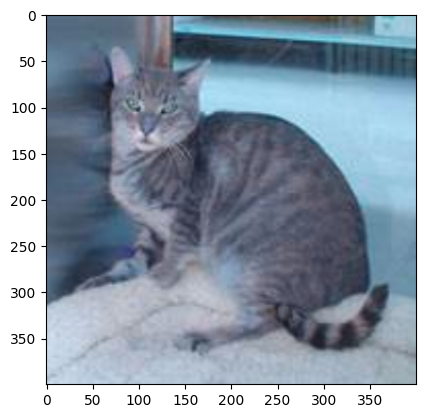

In [28]:
plt.imshow(x[200])

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
x_train.shape

(1416, 400, 400, 3)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
      epochs=10,
      validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5144 - loss: 25.6472 - val_accuracy: 0.5420 - val_loss: 0.6995
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5120 - loss: 0.6959 - val_accuracy: 0.5288 - val_loss: 0.6893
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5239 - loss: 0.6977 - val_accuracy: 0.5535 - val_loss: 0.6879
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5740 - loss: 0.7012 - val_accuracy: 0.5535 - val_loss: 0.6834
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5437 - loss: 0.7005 - val_accuracy: 0.5717 - val_loss: 0.6841
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5716 - loss: 0.6852 - val_accuracy: 0.6096 - val_loss: 0.6774
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5847 - loss: 0.6860 - val_accuracy: 0.5766 - val_loss: 0.6800
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5442 - loss: 0.6821 - val_accuracy: 0.6013 - val_loss

In [37]:
pred_values=model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [38]:
pred_values

array([[0.5170516 , 0.48294842],
       [0.47729427, 0.52270573],
       [0.3155529 , 0.6844471 ],
       ...,
       [0.55903286, 0.44096714],
       [0.34595805, 0.6540419 ],
       [0.5221155 , 0.47788447]], dtype=float32)

In [39]:
pred_classes=np.argmax(pred_values,axis=1)
pred_classes

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
catdog_matrix=confusion_matrix(y_test,pred_classes)
catdog_matrix

array([[195, 111],
       [147, 154]])

In [42]:
catdog_matrix.diagonal().sum() * 100/ catdog_matrix.sum()

np.float64(57.49588138385502)